Crystal Wang 

ECE 475 - Assignment # 1

# Organizing and Randomizing Data
Data normalized and divided up into three datasets: training, testing, and validation

Pre-processing for Stretch goals matrices are also included


In [ ]:
import pandas as pd
import numpy as np
import random

path = 'data.csv'
df = pd.read_csv(path)
index = np.arange(0,97).tolist()
originalData = df.iloc[index]
yOriginal = originalData[['lpsa']].values
allData = originalData.drop(["Unnamed: 0","train", "lpsa"],axis = 1)
originalData = originalData.drop(["Unnamed: 0","train", "lpsa"],axis = 1).values

# =============================================================================
# Nonlinear - Squared
# =============================================================================
stretchData = originalData**2
yOriginalS = yOriginal
yMeanS = np.mean(yOriginalS, axis = 0)
yStdS = np.std(yOriginalS, axis = 0)
yOriginalS = (yOriginalS-yMeanS)/yStdS
meanOriginalS = np.mean(stretchData, axis = 0)
stdOriginalS = np.std(stretchData, axis = 0)
# =============================================================================
# Feature Interation 
# =============================================================================
# I worked with Yingzhi for this part of the code
from sklearn.preprocessing import PolynomialFeatures

interaction = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

feature = interaction.fit_transform(originalData)
yOriginalF = yOriginal
yMeanF = np.mean(yOriginalF, axis = 0)
yStdF = np.std(yOriginalF, axis = 0)
yOriginalF = (yOriginalF-yMeanF)/yStdF
meanOriginalF = np.mean(feature, axis = 0)
stdOriginalF = np.std(feature, axis = 0)

# =============================================================================
# Part1 - Normalizing the dataset
# =============================================================================
yMean = np.mean(yOriginal, axis = 0)
yStd = np.std(yOriginal, axis = 0)
yOriginal = (yOriginal-yMean)/yStd
meanOriginal = np.mean(originalData, axis = 0)
stdOriginal = np.std(originalData, axis = 0)

# Normalizing the dataset
for i in range (len(originalData[1])):
  originalData[:,i] = (originalData[:,i]-meanOriginal[i])/stdOriginal[i]
  stretchData[:,i] = (stretchData[:,i]-meanOriginalS[i])/stdOriginalS[i]
  feature[:,i] = (feature[:,i]-meanOriginalF[i])/stdOriginalF[i]

# Initialization for the training data index list
trainn = []
while len(trainn) <= 77:
  rand = random.randrange(len(index))
  trainn.append(rand)
  index.pop(rand)
# print(index)
yTrain = yOriginal[trainn]
trainData = originalData[trainn]

yTrainS = yOriginalS[trainn]
trainDataS = stretchData[trainn]

yTrainF = yOriginalF[trainn]
trainDataF = feature[trainn]
# Initialization for the test data index list
testt = []
while len(testt) <= 9:
  rand2 = random.randrange(len(index))
  testt.append(rand2)
  index.pop(rand2)

yTest = yOriginal[testt]
testData = originalData[testt]

yTestS = yOriginalS[testt]
testDataS = stretchData[testt]

yTestF = yOriginalF[testt]
testDataF = feature[testt]

yValid = yOriginal[index]
validData = originalData[index]


# Part 1 - Linear Regression by hand


In [ ]:
'''
            This part of the code is the initialization of the input X for linear regression where a 1 is appended to each
'''

ones = np.array([])
while len(ones) <= 78:
  ones = np.append(ones,np.array([1]), axis = 0)

training = trainData
train = np.ndarray(shape=(0,len(training[0])+1))
test = np.ndarray(shape=(0,len(testData[0])+1))
for i in range(78):
  trainingSample = np.array([training[i]])
  train = np.append(train, np.append(np.array([[1]]),trainingSample, axis = 1),axis = 0)
for j in range(10):
  testSample = np.array([testData[j]])
  test = np.append(test, np.append(np.array([[1]]),testSample, axis = 1),axis = 0)
X1 = train[:,0:10]
XValid = validData[:,0:10]

In [ ]:
'''
                This part of the code implements the linear regression formula and calculates the MSE for baseline, testing and training.

                It implements eqn(3.6) from the textbook: 
        beta = (X^T * X)^-1 * X^T * y
Where X is the input matrix and y is the output label 
'''
transX1 = np.transpose(X1)
beta1 = np.matmul(np.matmul(np.linalg.inv(np.matmul(transX1, X1)),transX1),yTrain)
yHatTest = np.matmul(test, beta1)
yHatTrain = np.matmul(X1, beta1)
sumTest = 0
sumTrain = 0
sumBase = 0
for i in range(78):
  sumTrain = sumTrain + (np.square(yHatTrain[i]-yTrain[i]))

labelMean = np.sum(yTrain,axis = 0)/78

for i in range(10):
  sumTest = sumTest + (np.square(yHatTest[i]-yTest[i]))
  sumBase = sumBase + (np.square(labelMean-yTest[i]))
MSEBase = sumBase.astype(np.float)/10
MSE1Test = sumTest.astype(np.float)/10
MSE1Train = sumTrain.astype(np.float)/78
print("MSE for baseline: ", MSEBase)
print("MSE for Testing: ",MSE1Test)
print("MSE for Training: ",MSE1Train)


MSE for baseline:  [2.57693944]
MSE for Testing:  [0.56974311]
MSE for Training:  [0.18942052]


In [ ]:
'''
          This part of the code replicates Table 3.1 and 3.2.
'''
import math
allData = pd.DataFrame(allData, columns =["Intercept", "lcavol", "lweight", "age", "lbph", "svi", "lcp","gleason", "pgg4"] )
display(allData.corr)
variance = (1/(78 - 9 - 1))*sumTrain
std = math.sqrt(variance)
zScore = []
stdError = []
for i in range(len(beta1)):
  s = np.linalg.inv(np.matmul(transX1,X1))[i,i]
  stdError.append(std*math.sqrt(s))
  zScore.append(beta1[i]/(stdError[i]))
zScore = np.array(zScore)
stdError = np.array(stdError)

t = np.concatenate((beta1, np.transpose([stdError])),axis = 1)
t = np.concatenate((t,np.array(zScore)), axis = 1)

table = pd.DataFrame(data = t, columns = ["Coefficient", "Std.Error", "Z Score"], index = ["Intercept", "lcavol", "lweight", "age", "lbph", "svi", "lcp","gleason", "pgg4"])
display(table)

<bound method DataFrame.corr of     Intercept    lcavol   lweight  age      lbph  svi       lcp  gleason  pgg4
0         NaN -0.579818  2.769459   50 -1.386294    0 -1.386294        6   NaN
1         NaN -0.994252  3.319626   58 -1.386294    0 -1.386294        6   NaN
2         NaN -0.510826  2.691243   74 -1.386294    0 -1.386294        7   NaN
3         NaN -1.203973  3.282789   58 -1.386294    0 -1.386294        6   NaN
4         NaN  0.751416  3.432373   62 -1.386294    0 -1.386294        6   NaN
..        ...       ...       ...  ...       ...  ...       ...      ...   ...
92        NaN  2.830268  3.876396   68 -1.386294    1  1.321756        7   NaN
93        NaN  3.821004  3.896909   44 -1.386294    1  2.169054        7   NaN
94        NaN  2.907447  3.396185   52 -1.386294    1  2.463853        7   NaN
95        NaN  2.882564  3.773910   68  1.558145    1  1.558145        7   NaN
96        NaN  3.471966  3.974998   68  0.438255    1  2.904165        7   NaN

[97 rows x 9 column

,Coefficient,Std.Error,Z Score
Intercept,-0.235195,0.067070,-3.506699
lcavol,0.490985,0.084970,5.778306
lweight,0.169295,0.068660,2.465708
age,-0.174199,0.064223,-2.712405
lbph,0.206837,0.067851,3.048394
svi,0.284939,0.111108,2.564513
lcp,-0.124018,0.097983,-1.265699
gleason,0.159440,0.097585,1.633859
pgg4,0.077979,0.106818,0.730019


# Part 2 - Ridge Regression by hand

In [ ]:
'''
        This part of the code implements the Ridge Regression, chooses the optimal lambda, and calculates the MSE by using such lambda
'''
N = 10000
lamb = np.linspace(0,50, num = N)
Xr = trainData
I = np.identity(8)
rEachBeta = [[]]
rBeta = np.zeros((N,8))# 
rYHat = np.zeros((1,9))
rMSE = np.zeros((N,1))
rSumValid = np.zeros((N,1))
'''
Equation 3.44 from the textbook is used:
beta = (X^T * X + lamda*I)^-1 * X^T * ywhere lambda is a hyperparameter 
'''
# Finding the optimal lambda for the mdoel
for i in range(len(lamb)):
  rEachBeta = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(Xr),Xr) + lamb[i]*I),np.transpose(Xr)),yTrain)
  rBeta[i] = np.transpose(rEachBeta)
  rYHat = np.transpose(np.matmul(validData,rEachBeta))
  for j in range(9):
    rSumValid[i,0] = rSumValid[i,0] + ((rYHat[0,j]-yValid[j,0])**2)
  rMSE[i] = rSumValid[i]/9
min = np.argmin(rMSE)
optimalLamb = lamb[min]

print("optimalLamb: ", optimalLamb)

optimalBeta = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(Xr),Xr) + lamb[i]*I),np.transpose(Xr)),yTrain)

rYHatTest = np.matmul(testData, optimalBeta)
rSumTest = 0
for i in range(10):
  rSumTest = rSumTest + (np.square(rYHatTest[i]-yTest[i]))
rMSE_Test = rSumTest/10
print("Rigid MSE for Testing Dataset: ", rMSE_Test)


optimalLamb:  5.115511551155116
Rigid MSE for Testing Dataset:  [1.29328166]


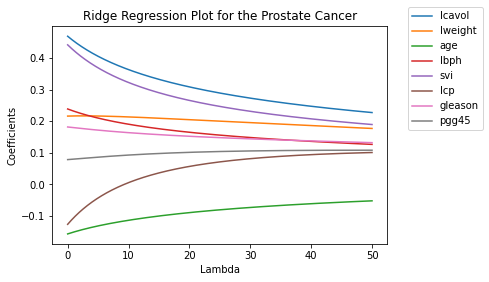

In [ ]:
'''
        This part of the code replicates figure 3.8 for ridge coefficient against lambda
'''
import matplotlib.pyplot as plt

labels = ["lcavol", "lweight", "age", "lbph", "svi", "lcp", "gleason", "pgg45"]

for i in range(8):
  plt.plot(lamb, rBeta[:,i], label = labels[i])

plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title('Ridge Regression Plot for the Prostate Cancer')
plt.legend(loc = 'lower right', bbox_to_anchor=(1.3,0.5))
plt.show()


# Part3 - Lasso regression using Sci-skit

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.723318539454972, tolerance: 0.006970286465045398
  positive)


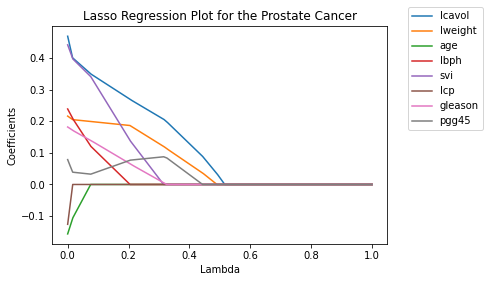

In [ ]:
from sklearn import linear_model
'''
        This part of the code implements Lasso regression using sklearn, finding the optimal lambda and plot lasso as 3.10
'''
laLambda = np.linspace(0,1, num = N)
XLa = trainData
globalMin = float('inf')
laBeta = np.zeros((N,8))
laYHat = np.zeros((1,9))
optimalLaLamb = 0
best = linear_model.Lasso(alpha = 0, fit_intercept=False)
# Finding the optimal lambda for the model
for i in range(N):
  laModel = linear_model.Lasso(alpha = laLambda[i], fit_intercept = False)
  laModel.fit(XLa, yTrain)
  # laYHat = laModel.predict(validData)
  # laMSE = np.sum(np.square(laYHat - yValid))/9
  if laModel.score(XValid, yValid) < globalMin:
    globalMin = laModel.score(XValid, yValid)
    optimalLaLamb = laLambda[i]
    best = laModel 
  laBeta[i] = laModel.coef_

# laOptYHat = best.predict(XTest)
# laTestMSE = np.sum(np.square(laOptYHat - yTest))/10
# print("Testing dataset MSE for Lasso Regression : ", laTestMSE)

for i in range(8):
  plt.plot(laLambda, laBeta[:,i], label = labels[i])

plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title('Lasso Regression Plot for the Prostate Cancer')
plt.legend(loc = 'lower right', bbox_to_anchor=(1.3,0.5))
plt.show()

# Stretch Goal - Nonlinear Terms & Feature Interactions


In [ ]:
'''
            This part of the code implements nonlinear terms and feature itneractions
'''
# =============================================================================
# Nonlinear - Squared
# Already Organized and Randomized squared dataset in the first section of the code
# =============================================================================
ones = np.array([])
while len(ones) <= 78:
  ones = np.append(ones,np.array([1]), axis = 0)

training = trainDataS
train = np.ndarray(shape=(0,len(training[0])+1))
test = np.ndarray(shape=(0,len(testDataS[0])+1))
for i in range(78):
  trainingSample = np.array([training[i]])
  train = np.append(train, np.append(np.array([[1]]),trainingSample, axis = 1),axis = 0)
for j in range(10):
  testSample = np.array([testDataS[j]])
  test = np.append(test, np.append(np.array([[1]]),testSample, axis = 1),axis = 0)
X1 = train[:,0:10]
XValid = validData[:,0:10]
transX1 = np.transpose(X1)
beta1 = np.matmul(np.matmul(np.linalg.inv(np.matmul(transX1, X1)),transX1),yTrain)
yHatTest = np.matmul(test, beta1)
yHatTrain = np.matmul(X1, beta1)
sumTest = 0
sumTrain = 0
sumBase = 0
for i in range(78):
  sumTrain = sumTrain + (np.square(yHatTrain[i]-yTrainS[i]))

labelMean = np.sum(yTrainS,axis = 0)/78

for i in range(10):
  sumTest = sumTest + (np.square(yHatTest[i]-yTestS[i]))
  sumBase = sumBase + (np.square(labelMean-yTestS[i]))
MSEBase = sumBase.astype(np.float)/10
MSE1Test = sumTest.astype(np.float)/10
MSE1Train = sumTrain.astype(np.float)/78
print("MSE for baseline for Squared Terms: ", MSEBase)
print("MSE for Testing for Squared Terms: ",MSE1Test)
print("MSE for Training for Squared Terms: ",MSE1Train)


MSE for baseline for Squared Terms:  [2.57693944]
MSE for Testing for Squared Terms:  [0.99728384]
MSE for Training for Squared Terms:  [0.2672889]


In [ ]:
# =============================================================================
# Feature Interation 
# =============================================================================
# I worked with Yingzhi for this part of the code
ones = np.array([])
while len(ones) <= 78:
  ones = np.append(ones,np.array([1]), axis = 0)

training = trainDataF
train = np.ndarray(shape=(0,len(training[0])+1))
test = np.ndarray(shape=(0,len(testDataF[0])+1))
for i in range(78):
  trainingSample = np.array([training[i]])
  train = np.append(train, np.append(np.array([[1]]),trainingSample, axis = 1),axis = 0)
for j in range(10):
  testSample = np.array([testDataF[j]])
  test = np.append(test, np.append(np.array([[1]]),testSample, axis = 1),axis = 0)
X1 = train
transX1 = np.transpose(X1)
beta1 = np.matmul(np.matmul(np.linalg.inv(np.matmul(transX1, X1)),transX1),yTrain)
yHatTest = np.matmul(test, beta1)
yHatTrain = np.matmul(X1, beta1)
sumTest = 0
sumTrain = 0
sumBase = 0
for i in range(78):
  sumTrain = sumTrain + (np.square(yHatTrain[i]-yTrainS[i]))

labelMean = np.sum(yTrainF,axis = 0)/78

for i in range(10):
  sumTest = sumTest + (np.square(yHatTest[i]-yTestF[i]))
  sumBase = sumBase + (np.square(labelMean-yTestF[i]))
  
MSEBase = sumBase.astype(np.float)/10
MSETest = sumTest.astype(np.float)/10
MSETrain = sumTrain.astype(np.float)/78
print("MSE for baseline for Feature Interactions: ", MSEBase)
print("MSE for Testing for Feature Interactions: ",MSETest)
print("MSE for Training for Feature Interactions: ",MSETrain)

MSE for baseline for Feature Interactions:  [2.57693944]
MSE for Testing for Feature Interactions:  [13.79539063]
MSE for Training for Feature Interactions:  [3.71186638]


I used linear regression for both the nonlinear regression and the feature interaction part. I chose squared input as the nonlinear term and used the feature interaction function PolynomialFeature in sklearn to generate the feature matrix with degree of 2. For the nonlinear term, the testing and the training MSE is generally lower than the baseline MSE, which means this could be a good model to use for this dataset. However,the MSEs for feature interaction is really high, producing worse testing and training MSEs than the baseline MSE. It does not seeme to improve the model.
  Overall the MSEs using normal features are better than the nonlinear feature. It did not show huge improvements for the model.

# New Dataset - Real estate price prediction

MSE for baseline:  [1.07958605]
MSE for Testing:  [0.32497001]
MSE for Training:  [0.34588124]


<bound method DataFrame.corr of      X2 house age  ...  X6 longitude
0            32.0  ...     121.54024
1            19.5  ...     121.53951
2            13.3  ...     121.54391
3            13.3  ...     121.54391
4             5.0  ...     121.54245
..            ...  ...           ...
409          13.7  ...     121.50381
410           5.6  ...     121.54310
411          18.8  ...     121.53986
412           8.1  ...     121.54067
413           6.5  ...     121.54310

[414 rows x 5 columns]>

,Coefficient,Std.Error,Z Score
Intercept,0.004253,0.035070,0.121263
House Age,-0.237615,0.035560,-6.682049
distance to the nearest MRT station,-0.331369,0.077491,-4.276219
number of convenience stores,0.330627,0.046999,7.034725
latitude,0.218102,0.041272,5.284557
longitude,0.012561,0.069957,0.179558


optimalLamb:  0.0
Rigid MSE for Testing Dataset:  [0.33663203]


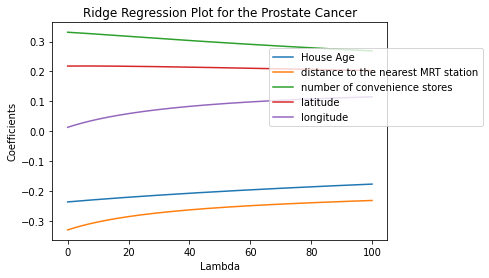

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:155: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.07040385144853, tolerance: 0.034179803837463184
  positive)


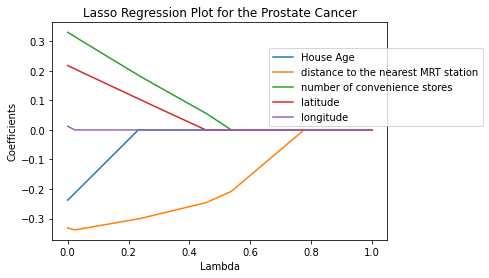

In [ ]:
'''
        The dataset is downloaded from https://www.kaggle.com/quantbruce/real-estate-price-prediction
'''
# ===================================================================================================
# Organizing, randomizing, and normalizing data
# ===================================================================================================
df = pd.read_csv("Real estate.csv")
index = np.arange(0,414).tolist()
originalData = df.iloc[index]
yOriginal = originalData[['Y house price of unit area']].values
allData = originalData.drop(["No","X1 transaction date", "Y house price of unit area"],axis = 1)
originalData = originalData.drop(["No","X1 transaction date", "Y house price of unit area"],axis = 1).values

yMean = np.mean(yOriginal, axis = 0)
yStd = np.std(yOriginal, axis = 0)
yOriginal = (yOriginal-yMean)/yStd
meanOriginal = np.mean(originalData, axis = 0)
stdOriginal = np.std(originalData, axis = 0)

# Normalizing the dataset
for i in range (len(originalData[1])):
  originalData[:,i] = (originalData[:,i]-meanOriginal[i])/stdOriginal[i]
# Initialization for the training data index list
train = []
while len(train) <330:
  rand = random.randrange(len(index))
  train.append(rand)
  index.pop(rand)
# print(index)
yTrain = yOriginal[train]
trainData = originalData[train]
# Initialization for the test data index list
test = []
while len(test) <  42:
  rand2 = random.randrange(len(index))
  test.append(rand2)
  index.pop(rand2)

yTest = yOriginal[test]
testData = originalData[test]
yValid = yOriginal[index]
validData = originalData[index]
# ===================================================================================================
# Part1 - Linear Regression by hand
# ===================================================================================================
ones = np.array([])
while len(ones) <= 330:
  ones = np.append(ones,np.array([1]), axis = 0)

training = trainData
train = np.ndarray(shape=(0,len(training[0])+1))
test = np.ndarray(shape=(0,len(testData[0])+1))
for i in range(330):
  trainingSample = np.array([training[i]])
  train = np.append(train, np.append(np.array([[1]]),trainingSample, axis = 1),axis = 0)
for j in range(42):
  testSample = np.array([testData[j]])
  test = np.append(test, np.append(np.array([[1]]),testSample, axis = 1),axis = 0)
X1 = train[:,0:6]

transX1 = np.transpose(X1)
beta1 = np.matmul(np.matmul(np.linalg.inv(np.matmul(transX1, X1)),transX1),yTrain)
yHatTest = np.matmul(test, beta1)
yHatTrain = np.matmul(X1, beta1)
sumTest = 0
sumTrain = 0
sumBase = 0
for i in range(330):
  sumTrain = sumTrain + (np.square(yHatTrain[i]-yTrain[i]))

labelMean = np.sum(yTrain,axis = 0)/330

for i in range(42):
  sumTest = sumTest + (np.square(yHatTest[i]-yTest[i]))
  sumBase = sumBase + (np.square(labelMean-yTest[i]))
MSEBase = sumBase.astype(np.float)/42
MSE1Test = sumTest.astype(np.float)/42
MSE1Train = sumTrain.astype(np.float)/330
print("MSE for baseline: ", MSEBase)
print("MSE for Testing: ",MSE1Test)
print("MSE for Training: ",MSE1Train)
display(allData.corr)
variance = (1/(330 - 42 - 1))*sumTrain
std = math.sqrt(variance)
zScore = []
stdError = []
for i in range(len(beta1)):
  s = np.linalg.inv(np.matmul(transX1,X1))[i,i]
  stdError.append(std*math.sqrt(s))
  zScore.append(beta1[i]/(stdError[i]))
zScore = np.array(zScore)
stdError = np.array(stdError)

t = np.concatenate((beta1, np.transpose([stdError])),axis = 1)
t = np.concatenate((t,np.array(zScore)), axis = 1)

table = pd.DataFrame(data = t, columns = ["Coefficient", "Std.Error", "Z Score"], index = ["Intercept", "House Age", "distance to the nearest MRT station", "number of convenience stores", "latitude", "longitude"])
display(table)

# ===================================================================================================
# Part2 - Ridge Regression
# ===================================================================================================

N = 10000
lamb = np.linspace(0,100, num = N)
Xr = trainData
I = np.identity(5)
rEachBeta = [[]]
rBeta = np.zeros((N,5))# 
rYHat = np.zeros((1,42))
rMSE = np.zeros((N,1))
rSumValid = np.zeros((N,1))
for i in range(len(lamb)):
  rEachBeta = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(Xr),Xr) + lamb[i]*I),np.transpose(Xr)),yTrain)
  rBeta[i] = np.transpose(rEachBeta)
  rYHat = np.transpose(np.matmul(validData,rEachBeta))
  for j in range(42):
    rSumValid[i,0] = rSumValid[i,0] + ((rYHat[0,j]-yValid[j,0])**2)
  rMSE[i] = rSumValid[i]/42
min = np.argmin(rMSE)
optimalLamb = lamb[min]

print("optimalLamb: ", optimalLamb)

optimalBeta = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(Xr),Xr) + lamb[i]*I),np.transpose(Xr)),yTrain)

rYHatTest = np.matmul(testData, optimalBeta)
rSumTest = 0
for i in range(42):
  rSumTest = rSumTest + (np.square(rYHatTest[i]-yTest[i]))
rMSE_Test = rSumTest/42
print("Rigid MSE for Testing Dataset: ", rMSE_Test)
labels = ["House Age", "distance to the nearest MRT station", "number of convenience stores", "latitude", "longitude"]

for i in range(5):
  plt.plot(lamb, rBeta[:,i], label = labels[i])

plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title('Ridge Regression Plot for the Prostate Cancer')
plt.legend(loc = 'lower right', bbox_to_anchor=(1.3,0.5))
plt.show()

# ===================================================================================================
# Part3 - Lasso Regression
# ===================================================================================================
laLambda = np.linspace(0,1, num = N)
XLa = trainData
globalMin = float('inf')
laBeta = np.zeros((N,5))
laYHat = np.zeros((1,42))
optimalLaLamb = 0
for i in range(N):
  laModel = linear_model.Lasso(alpha = laLambda[i])
  laModel.fit(XLa, yTrain)
  laYHat = laModel.predict(validData)
  laMSE = np.sum(np.square(laYHat - yValid))/42
  if laMSE < globalMin:
    globalMin = laMSE
    optimalLaLamb = laLambda[i]
  laBeta[i] = laModel.coef_
for i in range(5):
  plt.plot(laLambda, laBeta[:,i], label = labels[i])

plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title('Lasso Regression Plot for the Prostate Cancer')
plt.legend(loc = 'lower right', bbox_to_anchor=(1.3,0.5))
plt.show()


**Conlusion**

The MSEs from Linear Regression, Ridge Regression, and Lasso Regression 
and generally better than that of baseline. Since I chose to shuffle my entire data everytime I run, the results such as MSEs and my optimal lambdas will vary each time.
The dataset I chose is the relationship between the real estate price and its 5 factors. According to the results, lattitude and how convience is it from the convenience store seem like the two most important factors that contributed to the housing price. The lattitude and the longitutde range in this dataset is located in Taiwan, and it makes sense for lattitude to matter in Taiwan as the most developed cities are located in the northest and southest regions. The longitude, however, does not affect as Taiwan's west and east is seperated by mountains where less people live in and less cities are built. Having convenience store that can satisfy daily meals is one of Taiwan's daily lives and culture, it also makes sense for it to be important for real estate measures.